# Final Project Submission

Please fill out:
* Student name: Dominick D'Andrea
* Student pace: self-paced
* Scheduled project review date/time: 
* Instructor name: Jeff Herman
* Blog post URL:


# Introduction
## Background
In this project, the intended stakeholder is a real estate broker looking to obtain a competitve advantage over other brokers by developing a tool that can help its clients sell their home for top-dollar, or purchase a home at fair-value. 

The objective of this project twofold; the primary objective is to build a model that will effectively predict the price of a home (to be sold or purchased) given a specified set of features. The secondary objective is to identify the most important features impacting the price of a home in Kings County. Successful identification of these features will help inform future sellers of potential rennovations/upgrades that may increase the value of the home to be sold. 

## Process
Multiple linear regression (via OLS) analysis will be employed to create a predictive model of and identify the most influential factors impacting home prices. The quality of the model will be measured by the residual standard error (RSE) and the R<sup>2</sup> statistic. This project will be conducted following the OSEMN process.

The following outlines the steps that will be followed in an iterative and fluid process, according to OSEMN:
1. Obtain: The data for this project is conveniently already stored in a .csv file; for the purposes of this project, no further data will be collected.
2. Scrub: The data will be reviewed and formatted to search for missing values, convert categorical data into numeric data, replace values as needed, etc. in preparation for regression analysis.
3. Explore: While labeled as the third step, data will be visualized during the Scrub stage and the final Interpret stage to help determine necessary transformations, search for multicollinearity, and run regression diagnostics.
4. Model: As mentioned earlier, multiple linear regression via OLS will be employed to model the data. This stage will be highly iterative in order to build a model that maximizes R<sup>2</sup> through multiple processes, such as dimensionality reduction and feature engineering.
5. Interpret: The results of the model will be analyzed and used to determine the effectiveness of the model. As part of the iterative process, prior stages will likely be revisted several times before a satisfactory model is created.

# Data Exploration

In [1]:
# ignore jupyter notebook warnings
import warnings; warnings.simplefilter("ignore")

In [2]:
import pandas as pd

# load in raw data and preview
kc_raw = pd.read_csv("data/kc_house_data.csv")
pd.set_option("display.max_columns", None)

# preview data
kc_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# create prediction target and predictors
y = kc_raw["price"]
X = kc_raw.drop("price", axis=1)

In [4]:
# separate data into train and test
# use default test size of 25%
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
# view sizes of train data
print(f"X_train is a dataframe containing {X_train.shape[0]} rows and" \
      f" {X_train.shape[1]} columns")
print(f"y_train is a series containing {y_train.shape[0]} rows")

X_train is a dataframe containing 16197 rows and 20 columns
y_train is a series containing 16197 rows


In [6]:
# view datatypes and non-null counts
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16197 entries, 6405 to 15795
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             16197 non-null  int64  
 1   date           16197 non-null  object 
 2   bedrooms       16197 non-null  int64  
 3   bathrooms      16197 non-null  float64
 4   sqft_living    16197 non-null  int64  
 5   sqft_lot       16197 non-null  int64  
 6   floors         16197 non-null  float64
 7   waterfront     14441 non-null  float64
 8   view           16148 non-null  float64
 9   condition      16197 non-null  int64  
 10  grade          16197 non-null  int64  
 11  sqft_above     16197 non-null  int64  
 12  sqft_basement  16197 non-null  object 
 13  yr_built       16197 non-null  int64  
 14  yr_renovated   13318 non-null  float64
 15  zipcode        16197 non-null  int64  
 16  lat            16197 non-null  float64
 17  long           16197 non-null  float64
 18  sqf

## Initial Observations
Most of the data is already either formatted as an int or float. Before moving on, two features are currently of the datatype "object": "date" and "sqft_basement". "sqft_basement" can be easily converted into a float for future examination. 

"date" is a more interesting feature in that it may be useful to feature engineer a day of week, month, and year column to see if there are any significant correlations between these three new features and "price".

### Re-type "sqft_basement" as int 

In [7]:
# change dtype of sqft_basement to float (simpler than removing ".0" to re-type as int)
# kc_raw['sqft_basement'].astype('float') - produces ValueError because there 
# are entries that are not numbers

# find values that are not numbers
# print non-numbers and frequency of occurence
for value in X_train["sqft_basement"].value_counts().index:
    try:
        float(value)
    except:
        print(f"{value}: not a number")
        print(f"Number of occurences: {X_train['sqft_basement'].value_counts()[value]}")

?: not a number
Number of occurences: 340


In [8]:
# preview a few rows with sqft_basement = "?"
# to see if there are peculiarities with entire entry
X_train.loc[X_train["sqft_basement"] == "?"].head()

,id,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
13278,2768300736,4/8/2015,3,3.00,1760,2114,2.0,0.0,0.0,3,7,1400,?,2008,0.0,98107,47.6666,-122.370,1300,1500
2216,5309100295,10/17/2014,4,1.75,1500,6820,1.5,0.0,0.0,5,7,1500,?,1905,0.0,98117,47.6794,-122.370,1360,4125
6051,7691800130,8/26/2014,3,2.50,2790,6720,2.0,0.0,0.0,3,8,2790,?,2002,0.0,98075,47.5958,-122.038,2620,6720
15634,3755000020,9/17/2014,3,1.00,940,10500,1.0,0.0,0.0,4,7,940,?,1966,0.0,98034,47.7268,-122.229,1660,10500
8354,3295730040,7/15/2014,3,2.50,2150,5193,2.0,0.0,0.0,3,8,2150,?,1995,NaN,98033,47.6952,-122.187,2150,7172


There doesn't appear to be a specific reason why "?" is the entry for "sqft_basement" for a particular home. However, there are some instances in which the number of floors is 1, which would indicate there is no basement. In these cases, "sqft_basement" should have an entry of 0. 

Let's see if this will make a substantial impact on the outstanding number of entries with "?".

In [9]:
# find number of one story homes with "?" as sqft_basement
one_flr_unk_bas = X_train.loc[(kc_raw["sqft_basement"] == "?") 
                              & (X_train["floors"] == 1)].shape[0]

# print results
print(f"Number of 1 story homes with '?' as sqft_basement: {one_flr_unk_bas}")
print(f"Percent of entries with unkonwn basement sqft: {round(one_flr_unk_bas/len(X_train), 4)*100}%")

Number of 1 story homes with '?' as sqft_basement: 159
Percent of entries with unkonwn basement sqft: 0.98%


So, we can replace a little less than half of our entries with 0; however, the other entries are more puzzling. Most likely, they are there because the basement square footage is unkown. Since so many of the entries already have a 0 entry, it will be more useful to know whether a home has a basement or not. 

Since the remaining number of entries is 1%, "?" will be replaced with 0. Even if these homes do have basements, they only represent 1% of our data, which shouldn't skew the results much, if at all. So, entries with "?" will be changed to 0, the data will be re-typed as a float, and a new, replacement column will be created to indicate the presence of a basement.

To keep track of entries with "?", just in case the marker is significant and not just missing data, a missing indicator column will be created. If this feature ends up in the model, we will know to return to the feature for further exploration.

In [10]:
from sklearn.impute import MissingIndicator

# set missing value as "?" and create missing indicator array
sqft_basement_train = X_train[["sqft_basement"]]
missing_indicator = MissingIndicator(missing_values="?")
missing_indicator.fit(sqft_basement_train)
sqft_basement_missing_train = missing_indicator.transform(sqft_basement_train)

# verify number of rows matches number of rows and columns of X_train
assert X_train.shape[0] == sqft_basement_missing_train.shape[0]
assert sqft_basement_missing_train.shape[1] == 1 

# add missing indicator column to X_train dataframe
X_train["sqft_basement_missing"] = sqft_basement_missing_train
X_train["sqft_basement_missing"] = X_train["sqft_basement_missing"].astype(int)

In [11]:
# assign all "?" sqft_basement entries with 0
X_train["sqft_basement"].replace("?", 0, inplace=True)

In [12]:
# re-type sqft_basement as float
X_train["sqft_basement"] = X_train["sqft_basement"].astype("float")

In [13]:
# sqft_basement is a poor feature, as the majority of values are 0
# it's better to create a binary feature to indicate whether or not 
# a house has a basement

def has_basement(sqft_basement):
    '''
    A simple function to determine if a home has a basement or not
    depending on the square footage of the basement. If it's 0,
    than it is assumed the house does not have a basement.
    
    Params
    sqft_basement: the square footage of the basement
    '''
    
    if sqft_basement == 0:
        return 0
    else:
        return 1

In [14]:
# apply has_basement and create a new "has_basement" column in dataframe
X_train["has_basement"] = X_train["sqft_basement"].apply(lambda x: has_basement(x))

In [15]:
# drop "sqft_basement" from X_train
X_train.drop("sqft_basement", axis=1, inplace=True)

### Feature engineer a "day_of_week" and "month" column from date
It may be useful to see if there is a connection between the day of week and month a sale occurs, and the sale price. The year is irrelevant since they refer to past transactions, and the model will be used to predict future sales.

In [16]:
# begin by re-typing date as datetime
X_train["date"] = pd.to_datetime(X_train["date"])

In [17]:
# create new columns for day and month
X_train["day_of_week_sold"] = X_train["date"].dt.dayofweek
X_train["month_sold"] = X_train["date"].dt.month

In [18]:
# drop "date" column since we have extracted important info
X_train.drop("date", axis=1, inplace=True)

In [19]:
# quick view of data
X_train.head(5)

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_missing,has_basement,day_of_week_sold,month_sold
6405,3905080280,3,2.50,1880,4499,2.0,0.0,0.0,3,8,1880,1993,0.0,98029,47.5664,-121.999,2130,5114,0,0,2,3
937,5466420030,3,2.50,2020,6564,1.0,0.0,0.0,3,7,1310,1994,0.0,98042,47.3545,-122.158,1710,5151,0,1,1,10
19076,2623069010,5,4.00,4720,493534,2.0,0.0,0.0,5,9,3960,1975,0.0,98027,47.4536,-122.009,2160,219542,0,1,4,1
15201,4443800545,2,2.00,1430,3880,1.0,0.0,0.0,4,7,1430,1949,0.0,98117,47.6844,-122.392,1430,3880,0,0,0,3
13083,9485930120,3,2.25,2270,32112,1.0,0.0,0.0,4,8,1740,1980,0.0,98042,47.3451,-122.094,2310,41606,0,1,1,10


# Clean-up & pre-process data
Now that all the columns are numerical, the columns can be cleaned-up. The following is a list of changes based on observations of the data:
* waterfront: there are null values that need to be addressed
* view: there are null values that need to be addressed
* yr_renovated: this feature may be more appropriately addressed with a binary feature indicating whether a rennovation has taken place or not

In [20]:
# determine number of null entries in columns
X_train.isnull().sum()

id                          0
bedrooms                    0
bathrooms                   0
sqft_living                 0
sqft_lot                    0
floors                      0
waterfront               1756
view                       49
condition                   0
grade                       0
sqft_above                  0
yr_built                    0
yr_renovated             2879
zipcode                     0
lat                         0
long                        0
sqft_living15               0
sqft_lot15                  0
sqft_basement_missing       0
has_basement                0
day_of_week_sold            0
month_sold                  0
dtype: int64

In [21]:
# view value_counts of columns with null values
# yr_renovated is fairly straightforward; null values indicated
# the home has not been renovated
print(f"Waterfront\n{X_train['waterfront'].value_counts()}\n")
print(f"View\n{X_train['view'].value_counts()}")

Waterfront
0.0    14330
1.0      111
Name: waterfront, dtype: int64

View
0.0    14585
2.0      695
3.0      378
1.0      245
4.0      245
Name: view, dtype: int64


It's clear the for "waterfront", the data is binary, and a value 0 indicates the property is not waterfront while a value 1 indicates it is. There are 1,756 null values here; since the data is binary, imputing values would be useless. Therefore, the null values will be filled with 0 since that is the overwhelming majority of the data. A missing indicator column will be added in case the missing values are of signficance.

"view" is more complicated, as the feature is not well defined in its meaning. We could impute the value, but given there are only 49 null values, this method is probably not going to have an impact on our results. Therefore, the null values will be assinged 0. 

The "yr_renovated" column will be replace with "renovated" to indicate whether or not the home was renovated.

In [22]:
# create missing indicator array for waterfront
waterfront_train = X_train[["waterfront"]]
missing_indicator = MissingIndicator()
missing_indicator.fit(waterfront_train)
waterfront_missing_train = missing_indicator.transform(waterfront_train)

# verify number of rows matches number of rows and columns of X_train
assert X_train.shape[0] == waterfront_missing_train.shape[0]
assert waterfront_missing_train.shape[1] == 1 

In [23]:
# add missing indicator column to X_train
X_train["waterfront_missing"] = waterfront_missing_train
X_train["waterfront_missing"] = X_train["waterfront_missing"].astype(int)

In [24]:
# replace "waterfront" null values with 0
X_train["waterfront"].fillna(0, inplace=True)

In [25]:
# replace "view" null values with 0
X_train["view"].fillna(0, inplace=True)

In [26]:
# replace "yr_renovated" null values with 0
X_train["yr_renovated"].fillna(0.0, inplace=True)

In [27]:
def renovated(year):
    '''
    Simple function to determine if home was renovated based on the value
    of "year". If the year contains a date, it will be marked as renovated.
    
    Params
    year: entry from "year" column
    '''
    if year == 0.0:
        return False
    else:
        return True

In [28]:
# create new column "renovated" and apply renovated to indicate 
# if a renovation occured
X_train["renovated"] = X_train["yr_renovated"].apply(renovated)
X_train["renovated"] = X_train["renovated"].astype(int)

In [29]:
# drop "yr_renovated" from X_train
X_train.drop("yr_renovated", axis=1, inplace=True)

In [30]:
# preview data to ensure everything looks correct
X_train.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_missing,has_basement,day_of_week_sold,month_sold,waterfront_missing,renovated
6405,3905080280,3,2.50,1880,4499,2.0,0.0,0.0,3,8,1880,1993,98029,47.5664,-121.999,2130,5114,0,0,2,3,0,0
937,5466420030,3,2.50,2020,6564,1.0,0.0,0.0,3,7,1310,1994,98042,47.3545,-122.158,1710,5151,0,1,1,10,0,0
19076,2623069010,5,4.00,4720,493534,2.0,0.0,0.0,5,9,3960,1975,98027,47.4536,-122.009,2160,219542,0,1,4,1,0,0
15201,4443800545,2,2.00,1430,3880,1.0,0.0,0.0,4,7,1430,1949,98117,47.6844,-122.392,1430,3880,0,0,0,3,0,0
13083,9485930120,3,2.25,2270,32112,1.0,0.0,0.0,4,8,1740,1980,98042,47.3451,-122.094,2310,41606,0,1,1,10,0,0


In [31]:
# ensure all the null values have been resolved
X_train.isnull().sum()

id                       0
bedrooms                 0
bathrooms                0
sqft_living              0
sqft_lot                 0
floors                   0
waterfront               0
view                     0
condition                0
grade                    0
sqft_above               0
yr_built                 0
zipcode                  0
lat                      0
long                     0
sqft_living15            0
sqft_lot15               0
sqft_basement_missing    0
has_basement             0
day_of_week_sold         0
month_sold               0
waterfront_missing       0
renovated                0
dtype: int64

The columns are now numerical and don't contain any missing or null values. The next step in the preprocessing stage is to determine if the data requires a log transform and check to ensure the data meets the assumptions for a linear regression. These assumptions are linearity, normality, and homoscedasticity.  

## Visualize X_train columns

In [32]:
# drop "id" which is not a feature available for predictions
X_train.drop("id", axis=1, inplace=True)

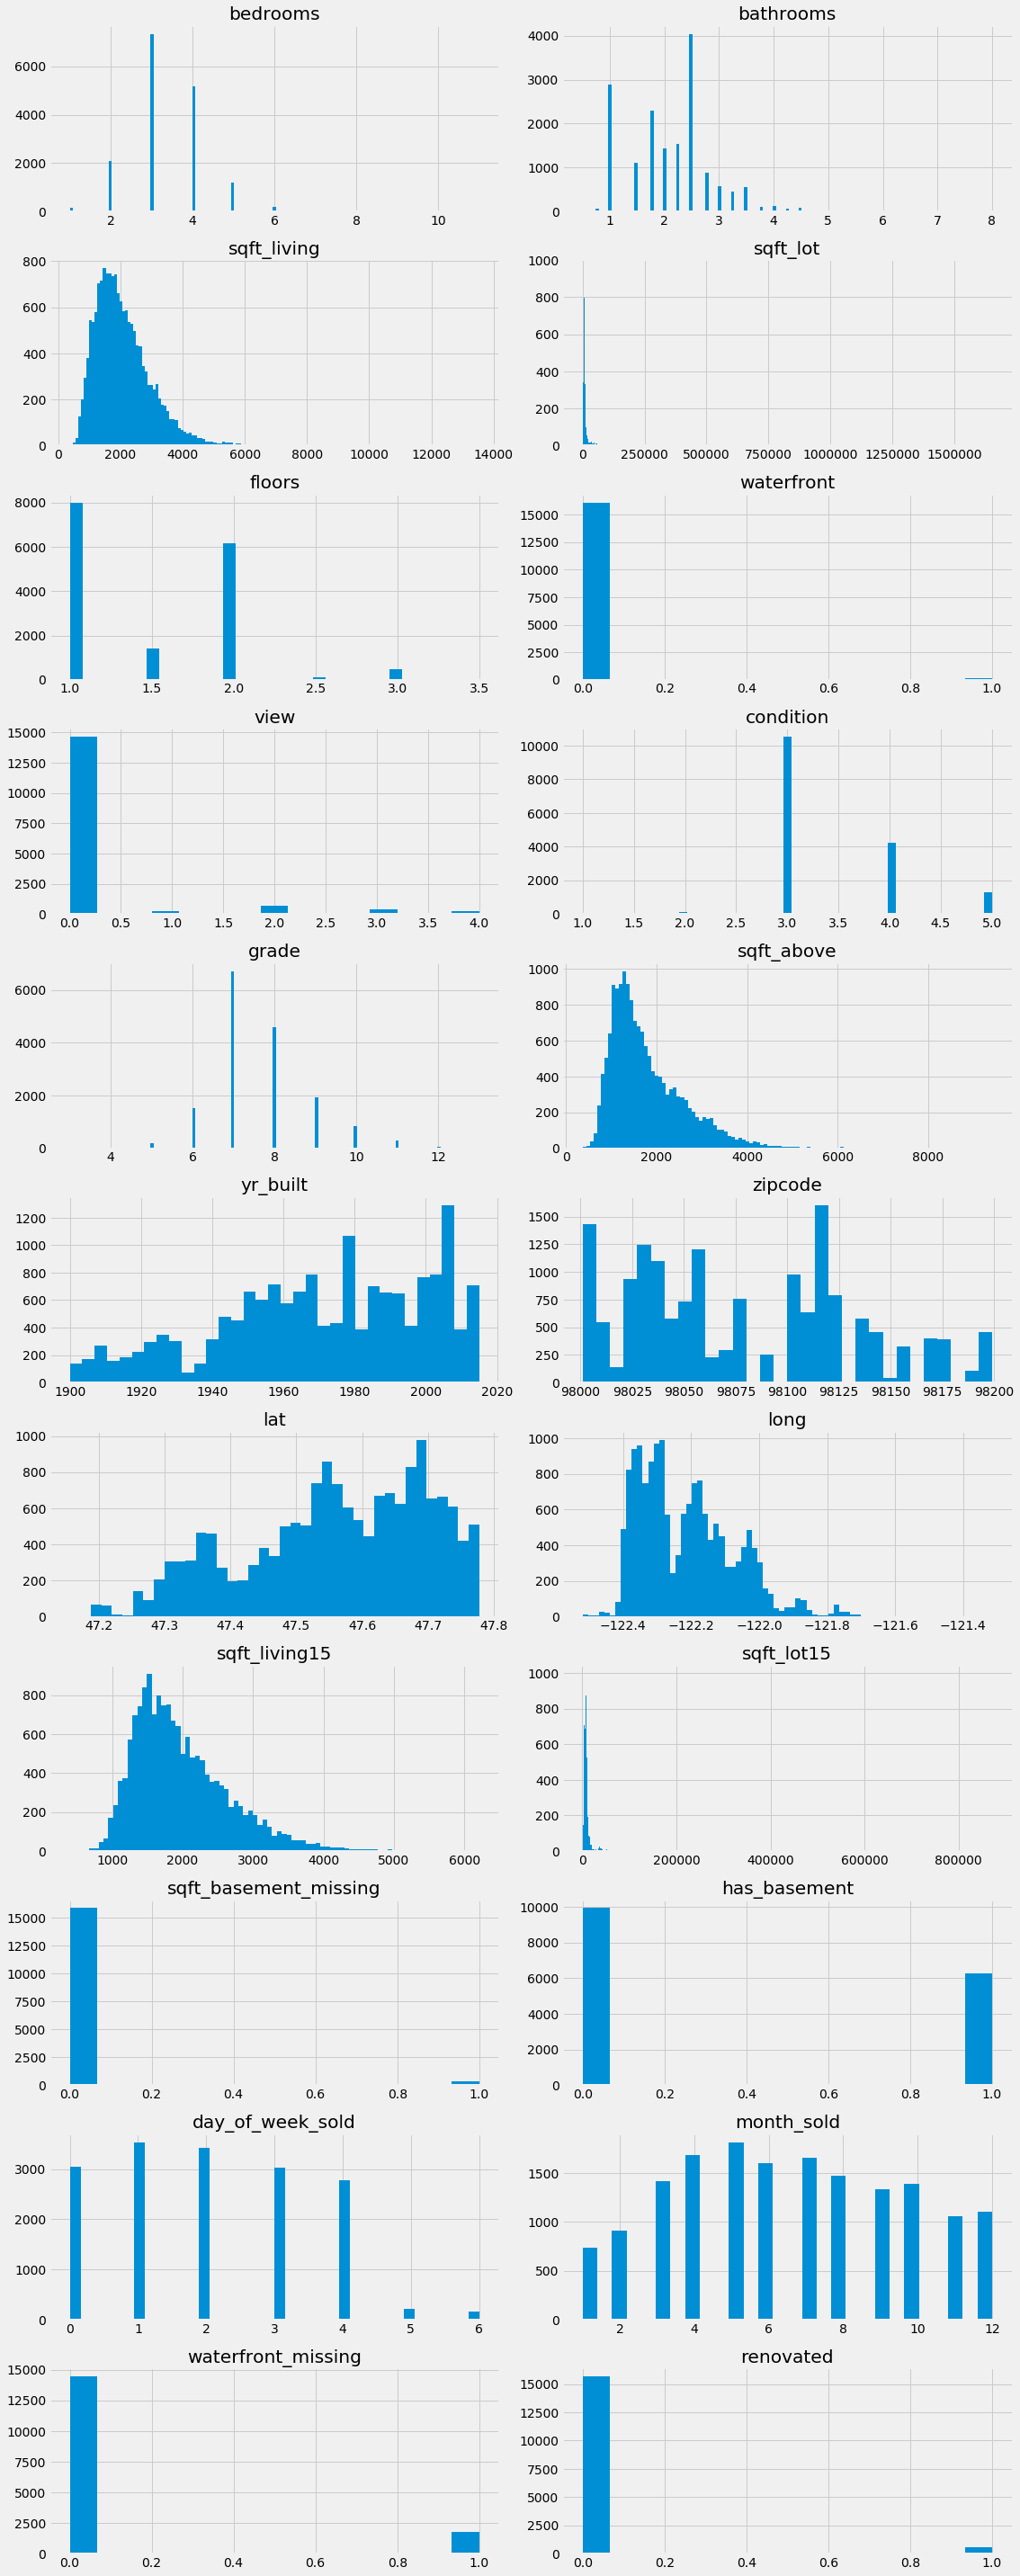

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use("fivethirtyeight")
sns.set_context('poster')

# list of columns
rel_cols = [column for column in X_train.columns]

# create histogram to visualize data distributions
fig, axes = plt.subplots(nrows=11, ncols=2, figsize=(16, 50))
for index, feature in zip(rel_cols, axes.flatten()):
    feature.hist(X_train[index], bins="auto")
    feature.set_title(index)
    
fig.tight_layout()

### Observations
It is apparent from the histograms that some of the features could benefit from log normalization.

Not all features will be log normalized due to the presence of 0's; some features are also not conducive to log normalization, such as discrete features. More advanced techniques can be employed to deal with these issues, but that is beyond the scope of this project. For now, only the following features will be log normalized:

* bedrooms
* bathrooms
* sqft_living
* sqft_lot
* sqft_above
* sqft_living15
* sqft_lot15

### Apply log transformation

In [34]:
# apply log transformation to selected features
import numpy as np

# features to transform
feat_to_transform = ["bedrooms",
                     "bathrooms",
                     "sqft_living",
                     "sqft_lot",
                     "sqft_above",
                     "sqft_living15",
                     "sqft_lot15"]

# apply transformation to specified features
for feature in feat_to_transform:
    X_train[feature] = X_train[feature].apply(lambda x: np.log(x))

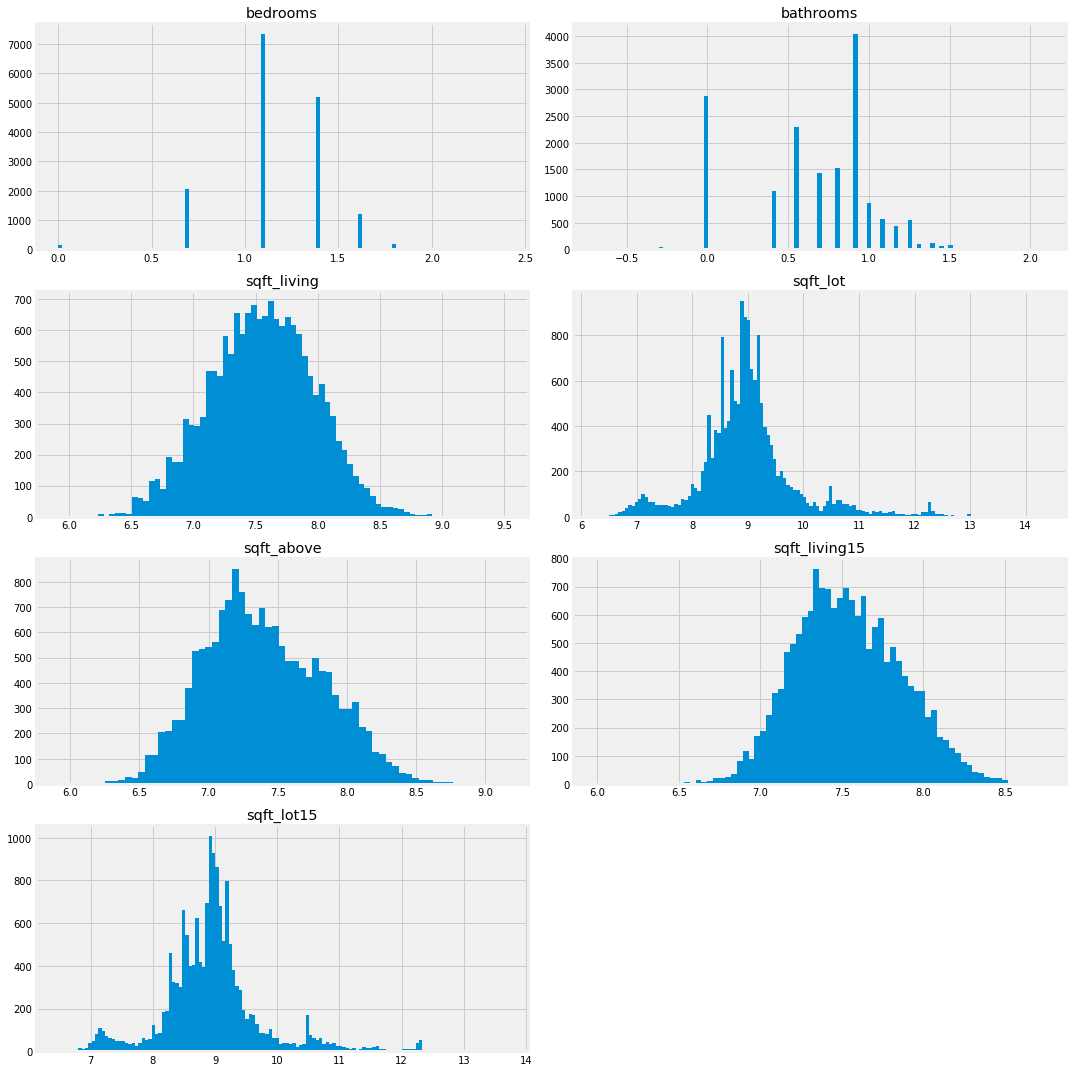

In [35]:
# preview transformed data
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 15))
for index, feature in zip(feat_to_transform, axes.flatten()):
    feature.hist(X_train[index], bins="auto")
    feature.set_title(index)
    
axes.flat[-1].set_visible(False)
fig.tight_layout()

In [36]:
# preview transformed data
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_missing,has_basement,day_of_week_sold,month_sold,waterfront_missing,renovated
6405,1.098612,0.916291,7.539027,8.411610,2.0,0.0,0.0,3,8,7.539027,1993,98029,47.5664,-121.999,7.663877,8.539737,0,0,2,3,0,0
937,1.098612,0.916291,7.610853,8.789355,1.0,0.0,0.0,3,7,7.177782,1994,98042,47.3545,-122.158,7.444249,8.546946,0,1,1,10,0,0
19076,1.609438,1.386294,8.459564,13.109347,2.0,0.0,0.0,5,9,8.283999,1975,98027,47.4536,-122.009,7.677864,12.299299,0,1,4,1,0,0
15201,0.693147,0.693147,7.265430,8.263590,1.0,0.0,0.0,4,7,7.265430,1949,98117,47.6844,-122.392,7.265430,8.263590,0,0,0,3,0,0
13083,1.098612,0.810930,7.727535,10.376985,1.0,0.0,0.0,4,8,7.461640,1980,98042,47.3451,-122.094,7.745003,10.636000,0,1,1,10,0,0


### Observations
Performing the log transform and scaling the features has definitely improved the distribution for many, while a few still don't look perfect. However, the importantance of normality comes into play with the residuals, which will be analyzed during the regression diagnostics stage.

# Baseline model
Now that the data has been pre-processed, a baseline model will be established as the foundation of the modelling stage. We begin by generating a correlation heatmap to see which feature has the highest correlation to "price". This will serve as our sole feature for the baseline model.

In [37]:
# first, log normalize y_train
y_train = pd.DataFrame(y_train) 
y_train = y_train.apply(lambda x: np.log(x))

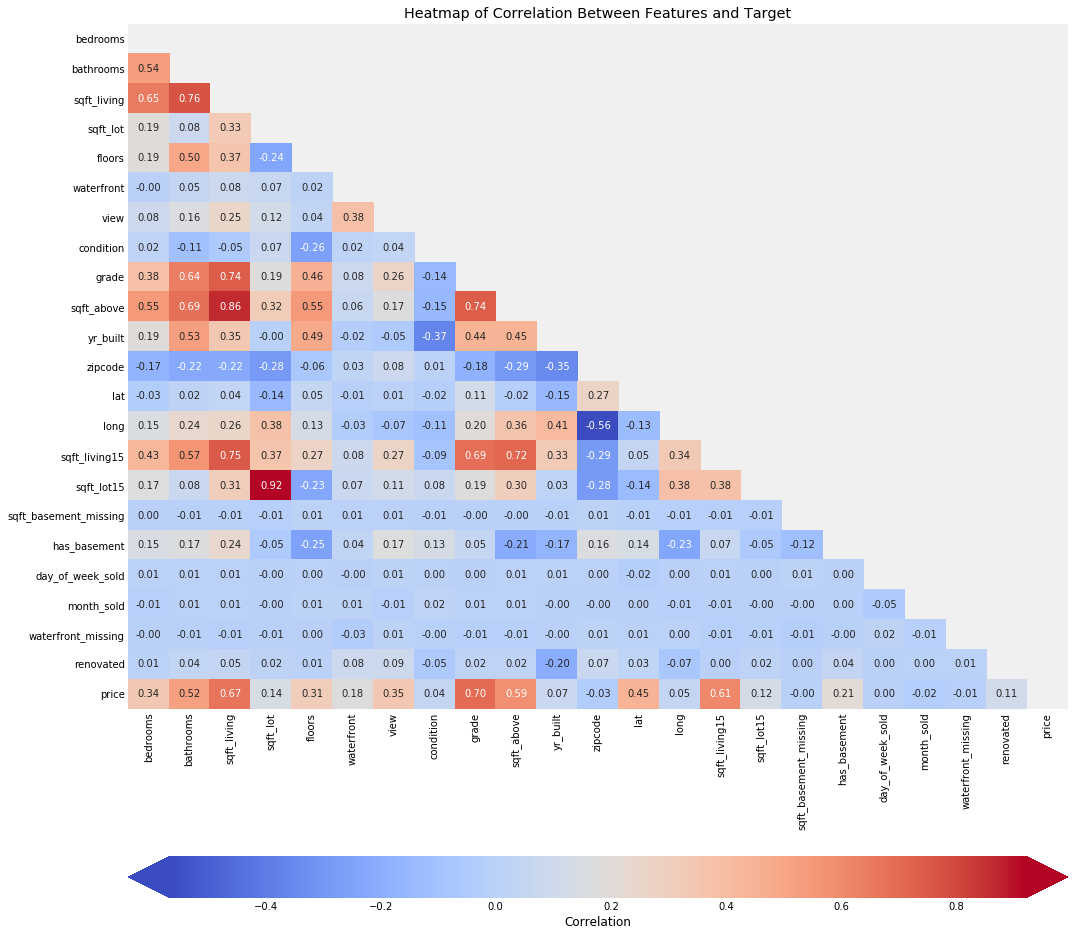

In [38]:
# create a correlation heatmap
# set up dataframe with features and target
heatmap_data = pd.concat([X_train, y_train], axis=1)

# calculate the correlation matrix
corr = heatmap_data.corr()

# visualize the results
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,18))

sns.heatmap(
    data=corr,
    fmt=".2f",
    cmap="coolwarm",
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    annot=True,
    cbar_kws={"label": "Correlation", 
              "orientation": "horizontal", 
              "pad": .15, 
              "extend": "both"})

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.set_title("Heatmap of Correlation Between Features and Target");

### Observations
While there is a lot to unpack from this visual, for the baseline model, we are most interested in the feature with the highest correlation to "price", which would be "grade" followed closely by "sqft_living". The next step is to verify that "grade" exhibits a linear relationship with price.

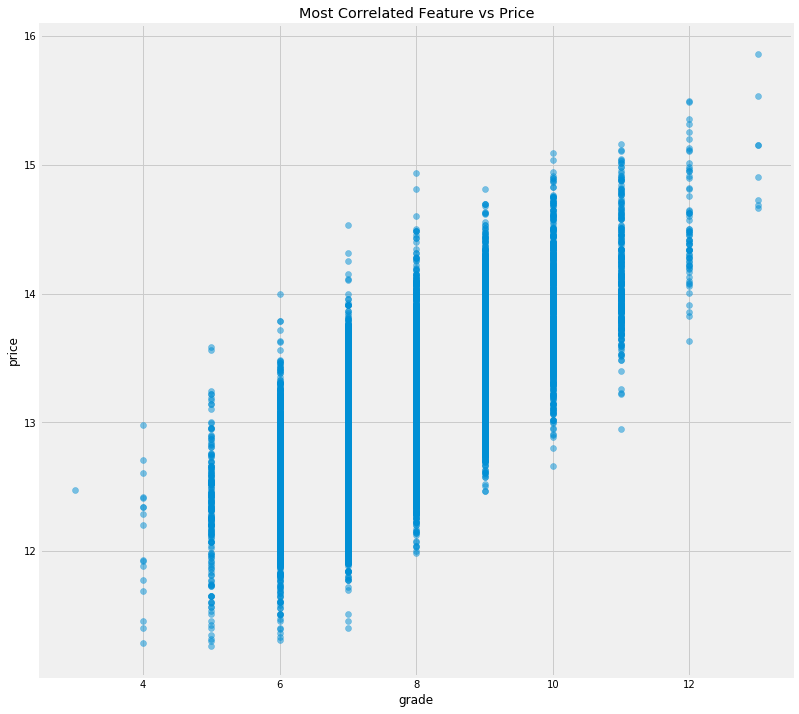

In [120]:
# create scatterplot of most correlated feature to see
# if the feature has a linear relationship with the target
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(X_train["grade"], y_train, alpha=0.5)
ax.set_xlabel("grade")
ax.set_ylabel("price")
ax.set_title("Most Correlated Feature vs Price");

It is clear that "grade" does not have a linear relationship with "price". We will take a look at the next highest correlated feature, "sqft_living", for a comparison.

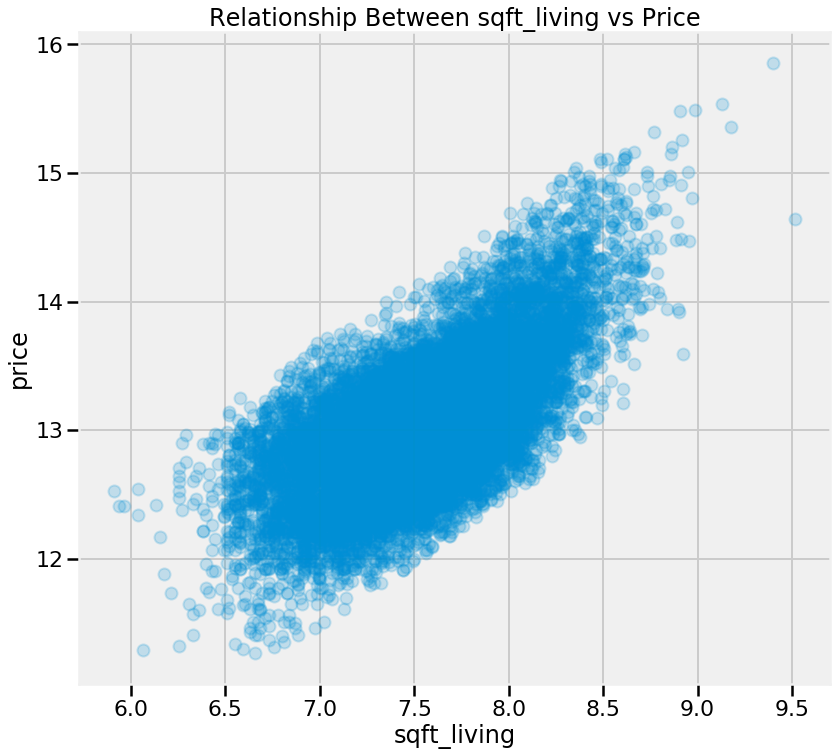

In [155]:
# create a scatterplot of sqft_living versus price
fig, ax = plt.subplots(figsize=(12,12))

ax.scatter(X_train['sqft_living'], y_train, alpha=0.2)
ax.set_xlabel("sqft_living")
ax.set_ylabel("price")
ax.set_title("Relationship Between sqft_living vs Price");

While not completely linear, "sqft_living" has a much cleaner and more linear relationship with "price". Therefore, even though "grade" may have a higher correlation with "price", it will produce a lesser model since it violates the linearity assumption for linear regressions.

In [41]:
# import sklearn to run cross validation on initial model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
baseline_model = LinearRegression()

In [42]:
from sklearn.model_selection import cross_validate, ShuffleSplit

# create splitter for cross-validation with 10 splits
splitter = ShuffleSplit(n_splits=10, test_size=0.25, random_state=14)

# create baseline model with "sqft_living" as sole feature
baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train[["sqft_living"]],
    y=y_train,
    return_train_score=True,
    cv=splitter)

# print out scores
print(f"Train score:\t\t", baseline_scores["train_score"].mean())
print(f"Validation score: \t", baseline_scores["test_score"].mean())

Train score:		 0.45491447590835676
Validation score: 	 0.454760145146866


The results above indicate the r-squared scores. That means that each of them represents the amount of variance of the target ("price") that is explained by the feature ("sqft_living") and parameters (intercept value and coefficient value for feature). 

It's unsurprising that the score is so low; first, none of the features alone have a very strong correlation with price. Even though "grade" had the highest, the data wasn't linear. As more features are added, the score will improve.

## Feature selection
Now that a baseline has been established, the goal is to find the minimum number of features that will generate the maximum r-squared value to keep the model as simple as possible. To accomplish this, recursive feature elimination and cross-validation (RFECV) from sklearn will be employed. While it is possible to take several other routes, including sklearn's recursive feature elimination (RFE), RFECV will automatically determine the optimal number of features (unlike RFE, where the number of features to select is manually entered).

Once the critical features are selected, interactions between features will be analyzed to determine if feature engineering is necessary.

In [43]:
# create secondary model using RFECV to determine the 
# optimal number of features
from sklearn.feature_selection import RFECV

secondary_model = LinearRegression()

# initialize and fit the model
# begin by requiring a minimum of 1 feature
rfecv = RFECV(
    estimator=secondary_model,
    min_features_to_select=1,
    step=1,
    scoring="r2",
    cv=splitter)

# fit the model and print the optimal number of features that
# maximizes the r-squared score
rfecv.fit(X_train, y_train)
print(f"Optimal number of features: {rfecv.n_features_}")

Optimal number of features: 22


23 is the total number of features in our dataset, so our optimal number of features seems pretty high. Let's graph the results to get a feel for how the r-squared changes as we introduce more features.

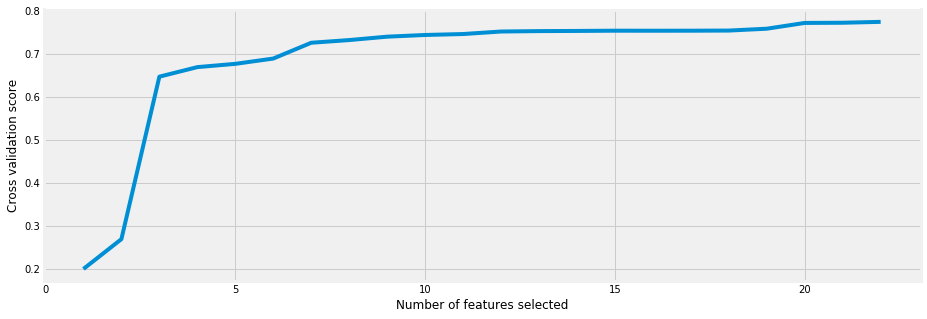

In [44]:
# see how CV score changes as features are added to model
fig, ax = plt.subplots(figsize=(14,5))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score")
plt.show()

It appears that although all the features together do generate the highest cross validation score, there is a significant diminishing return after 5-10 features. Let's take a look at the cross validation score as we add more features.

In [45]:
# observe numeric change in cv score as more features are added
cv_scores = pd.DataFrame(rfecv.grid_scores_, columns=["cv_score"])
cv_scores.head(10)

,cv_score
0,0.199508
1,0.268928
2,0.647210
3,0.669453
4,0.677047
5,0.689403
6,0.726172
7,0.732439
8,0.740345
9,0.744303


It's clear that after adding 7-8 features, adding an extra feature results in a reduced increase in the cv score. After 7-8 features, simply adding another feature will inrease the score by the nature of r-squared (this is where the adjusted r-squared value will come into play later). Let's take a look at what these 8 features are and determine if we should use 7 or 8 features in our model.

In [46]:
from sklearn.feature_selection import RFE
features = LinearRegression()

# find the top 7-8 most important features

for i in range(1,9):
    rfe = RFE(
        estimator=features,
        n_features_to_select=i)

    # fit model to training data
    rfe.fit(X_train, y_train)

    # print important information
    print(f"Most important features: {list(X_train.columns[rfe.support_])}")
    print(f"Model r-squared: {rfe.score(X_train, y_train)}\n")

Most important features: ['lat']
Model r-squared: 0.20086741308147615

Most important features: ['waterfront', 'lat']
Model r-squared: 0.2344263526957225

Most important features: ['sqft_living', 'waterfront', 'lat']
Model r-squared: 0.6488001336165183

Most important features: ['sqft_living', 'waterfront', 'lat', 'sqft_living15']
Model r-squared: 0.6701536887197244

Most important features: ['sqft_living', 'waterfront', 'lat', 'sqft_living15', 'renovated']
Model r-squared: 0.6744080734953117

Most important features: ['sqft_living', 'waterfront', 'grade', 'lat', 'sqft_living15', 'renovated']
Model r-squared: 0.7211571593307886

Most important features: ['sqft_living', 'waterfront', 'grade', 'lat', 'sqft_living15', 'has_basement', 'renovated']
Model r-squared: 0.7241420792883737

Most important features: ['sqft_living', 'waterfront', 'grade', 'sqft_above', 'lat', 'sqft_living15', 'has_basement', 'renovated']
Model r-squared: 0.7245283577989267



We can see from this analysis that 7 features are optimal for this model. Adding the 8th feature, which in this case turns out to be "sqft_above", does not improve our model much, and only complicates the model further.

In [47]:
# run model with the 7 top features
rfe = RFE(
    estimator=features,
    n_features_to_select=7)

# fit model to training data
rfe.fit(X_train, y_train)

# print important information
print(f"Most important features: {list(X_train.columns[rfe.support_])}")
print(f"Model r-squared: {rfe.score(X_train, y_train)}\n")

Most important features: ['sqft_living', 'waterfront', 'grade', 'lat', 'sqft_living15', 'has_basement', 'renovated']
Model r-squared: 0.7241420792883737



We now have a good list of features to perform further analysis on. The r-squared score is pretty close to what was expected given 7 features as inputs (the prior model averaged the r-squared scores of 10 different samples). Let's explore the interactions between all the features in X_train to see if there are any interactions that could boost the r-squared score.

## Exploring feature interactions

In [48]:
# current list of features used in model identified using RFE
model_features = list(X_train.columns[rfe.support_])

# current best performing model
rfe_model = rfe.score(X_train, y_train)
rfe_model

0.7241420792883737

In [49]:
from itertools import combinations
from sklearn.model_selection import cross_val_score

# initialize list of feature combinations
interactions = []

# create combinations of 2 features
feat_combinations = combinations(X_train.columns, 2)

# explore all combinations of features to determine if they 
# increase the r-squared value
data = X_train.copy()
data = data[model_features]
for i, (a, b) in enumerate(feat_combinations):
    data["interaction"] = X_train[a] * X_train[b]
    
    score = np.mean(cross_val_score(
                    LinearRegression(), 
                    data, y_train, 
                    scoring='r2', 
                    cv=splitter))
    
    interactions.append((a, b, round(score,3)))

# print list of top 10 interactions sorted by highest r-squared score
print("Top 10 interactions: %s" 
      %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:10])

Top 10 interactions: [('yr_built', 'zipcode', 0.752), ('yr_built', 'lat', 0.752), ('yr_built', 'sqft_living15', 0.752), ('sqft_living', 'yr_built', 0.751), ('yr_built', 'long', 0.751), ('grade', 'yr_built', 0.75), ('condition', 'grade', 0.739), ('condition', 'sqft_above', 0.739), ('condition', 'sqft_living15', 0.739), ('sqft_living', 'condition', 0.738)]


Above, we have a preview of the interactions that boost the r-squared score the most. "yr_built*zipcode" improved our r-squared score the most, so the interaction between them should definitely be added to the model.

In [50]:
# run regression analysis to find r-squared
# create a final dataset

X_train_1 = X_train.copy()

improved = LinearRegression()

# add feature interations to final
X_train_1["yr_built*zipcode"] = X_train_1["yr_built"] * X_train_1["zipcode"]

# add new features to model_features
model_features.append("yr_built*zipcode")

# calculate the score of the improved model
improved_model = cross_validate(
                 estimator=improved,
                 X=X_train_1[model_features],
                 y=y_train,
                 return_train_score=True,
                 scoring="r2",
                 cv=splitter)

# print result
print(f"Train score:\t\t", improved_model["train_score"].mean())
print(f"Validation score: \t", improved_model["test_score"].mean())

Train score:		 0.75228408672975
Validation score: 	 0.752106544044279


# Predict prices using X_test
Now that we have created a fine-tuned model, the same pre-processing steps must be applied to the testing data. Once completed, the model can be used to predict the prices of the houses in the testing data.

In [51]:
# apply preprocessing done above to X_test 

# add column to dataframe indicating if the home was renovated
X_test["renovated"] = X_test["yr_renovated"].apply(renovated)
X_test["renovated"] = X_test["renovated"].astype(int)

# apply has_basement and create a new "has_basement" column in dataframe
X_test["has_basement"] = X_test["sqft_basement"].apply(lambda x: has_basement(x))

# assign all "?" sqft_basement entries with 0
X_test["sqft_basement"].replace("?", 0, inplace=True)
              
# re-type sqft_basement as float
X_test["sqft_basement"] = X_test["sqft_basement"].astype("float")

# apply has_basement and create a new "has_basement" column in dataframe
X_test["has_basement"] = X_test["sqft_basement"].apply(lambda x: has_basement(x))

# drop "sqft_basement" from X_train
X_test.drop("sqft_basement", axis=1, inplace=True)
                           
# replace "waterfront" null values with 0
X_test["waterfront"].fillna(0, inplace=True)

# apply transformation to specified features
for feature in feat_to_transform:
    X_test[feature] = X_test[feature].apply(lambda x: np.log(x))

In [52]:
# apply preprocessing done above to y_test 
y_test = pd.DataFrame(y_test) 
y_test = y_test.apply(lambda x: np.log(x))

# Model 1: Top 7 Features


In [53]:
# apply transformations unique to first round of model testing
X_test_r1 = X_test.copy()

# add selected feature interation to test dataframe
X_test_r1["yr_built*zipcode"] = X_test_r1["yr_built"] * X_test_r1["zipcode"]

test_columns = ["sqft_living",
                "waterfront",
                "grade",
                "lat",
                "sqft_living15",
                "renovated",
                "has_basement",
                "yr_built*zipcode"]

X_test_r1 = X_test_r1[test_columns]

In [54]:
# fit training data to model
clf = LinearRegression()
model_1 = clf.fit(X_train_1[model_features], y_train)
model_1_score = clf.score(X_train_1[model_features], y_train)
    
# predict and score estimates for testing data
ypreds_1 = model_1.predict(X_test_r1)

# retreive r-squared score for prediction
model_1_predict = model_1.score(X_test_r1, y_test)

print(f"----Model 1----")
print(f"Model r-squared: {model_1_score}")
print(f"Prediction r-squared: {model_1_predict}")

----Model 1----
Model r-squared: 0.7523447121017839
Prediction r-squared: 0.7376855416660165


## Calculate residual standard error
Aside from the model's r-squared score, another important statistic for evaluating the accuracy of a linear model is the residual standard error (RSE). RSE explains the average distance of a point from the fitted model in the units of the dependent variable, making it highly interpretable. The formula for RSE is:


<div align=center> $RSE = \sqrt{\frac{\sum_{i=1}^{n}(Y_i-\hat{Y_i})^2}{n}}$ where </div>
<div align=center> $i=$ number of observations </div>
<div align=center> $n=$ degrees of freedom </div>
<div align=center> $Y=$ actual y values </div>                       
<div align=center> $\hat{Y}=$ predicted y values </div>

In [55]:
def RSE(y_preds, y_actual, y_model=y_test):
    
    '''
    The residual standard error is calculated as the square root of the 
    mean squared error and reflects the average distance of each point
    from the fitted model. The benefit RSE has is that it is given in 
    the units of the dependent variable, making it highly interpretable.
    This function takes in the predicted and actual values, exponentiates
    them to reverse the log normalization affect, and calculates the error
    term. It also expresses RSE as a percent of the average actual 
    observations.
    
    ----Params----
    y_preds: the predicted y values from the model 
    y_actual: the actual, observed data
    y_model: if the y_train data has been manipulated in any way that
             would affect the indices of the data, this optional parameter
             will adjust the index of the predicted values
             
    ----Returns----
    rmse: the residual standard error of the data, rounded to 2 decimal
          places
    percent_error: the fraction of rmse to the average observed y values
    '''

    # get y predictions of y_train from model and put in dataframe
    y_preds = pd.DataFrame(y_preds, index=y_model.index, columns=["pred"])
    y_actual = pd.DataFrame(y_actual)
    y_actual.rename(columns={"price": "actual"}, inplace=True)

    # merge and take antilog of both y_train and y_actual
    y_vals = pd.merge(y_preds, y_actual, left_index=True, right_index=True)
    y_vals["actual"] = y_vals["actual"].apply(lambda x: np.exp(x))
    y_vals["pred"] = y_vals["pred"].apply(lambda x: np.exp(x))

    # calculate difference between actual and predicted prices
    y_vals["diff"] = y_vals["actual"] - y_vals["pred"]

    # square difference
    y_vals["diff_squared"] = y_vals["diff"]**2

    # calculate sum of squared errors divided by degree of freedom
    # there are 8 features; degree of freedom is length of data less features
    mse = np.sum(y_vals["diff_squared"])/(len(y_vals["diff_squared"])-8)

    # calculate root of mse - this is residual error in units of price
    # calculate the perecent of rmse to average y_actual
    rmse = round(np.sqrt(mse), 2)
    percent_error = round(rmse/y_vals["actual"].mean()*100, 2)
    
    return rmse, percent_error

In [56]:
# calculate the error stats for Model 1
rmse, percent_error = RSE(ypreds_1, y_test)
print(f"----Model 1 Error Tests----")
print(f"Residual error: ${rmse}")
print(f"Percent error: {percent_error}%")

----Model 1 Error Tests----
Residual error: $192610.79
Percent error: 35.85%


# Model 2: Removing Outliers

## Outlier and high leverage observation handling

It is quite possible that the r-squared value can be improved even further by dealing with outliers high influence on the model. We will therefore look for outliers using studentized residuals and Cook's Distance. The outlier test that will have the smallest impact on our data will be used.

***Note: Removing outliers from any dataset to improve results should be throroughly considered. There are other methods for dealing with outliers aside from removal, and removal of outliers may lead to an oversight of important data. For this exercise, however, we are simply exploring the effects of outlier removal on the r-squared value.***

In [57]:
import statsmodels.api as sm

In [59]:
results_1 = sm.OLS(y_train, sm.add_constant(X_train_1[model_features])).fit()

# compile key statistics from model
influence = results_1.get_influence()

# create dataframe from statistics
influence_df = pd.DataFrame(influence.summary_frame())

In [60]:
# "hat_diag" contains the leverage data - rename column
influence_df.rename(columns={"hat_diag": "leverage"}, inplace=True)

In [61]:
# identify number of residuals above/below 2
# residuals above 2 are concerning
resids_abv_2 = influence_df.loc[abs(influence_df["standard_resid"]) > 2]
num_resids_abv_2 = influence_df.loc[abs(influence_df["standard_resid"]) > 2].shape[0]

print(f"Number of points with residuals above/below 2: {num_resids_abv_2}")
print(f"Percent of data points with residuals above/below 2:" \
      f" {num_resids_abv_2/X_train_1.shape[0]*100}%")

Number of points with residuals above/below 2: 791
Percent of data points with residuals above/below 2: 4.8836204235352225%


In [62]:
# identify number of residuals above/below 3
# residuals above 3 are very concerning
resids_abv_3 = influence_df.loc[abs(influence_df["standard_resid"]) > 3]
num_resids_abv_3 = influence_df.loc[abs(influence_df["standard_resid"]) > 3].shape[0]

print(f"Number of points with residuals above/below 3: {num_resids_abv_3}")
print(f"Percent of data points with residuals above/below 3:" \
      f" {num_resids_abv_3/X_train_1.shape[0]*100}%")

Number of points with residuals above/below 3: 101
Percent of data points with residuals above/below 3: 0.6235722664690992%


In [63]:
# identify outliers using Cook's Distances
cooks_d = influence_df.loc[:,"cooks_d"].mean()
cutoff = cooks_d*3
cooks_outliers = influence_df.loc[abs(influence_df["cooks_d"]) > cutoff]
num_outliers = outliers = influence_df.loc[abs(influence_df["cooks_d"]) > cutoff].shape[0]

print(f"Number of outliers above Cook's cutoff: {num_outliers}")
print(f"Percent of outliers above Cook's cutoff: {num_outliers/X_train_1.shape[0]*100}%")

Number of outliers above Cook's cutoff: 1093
Percent of outliers above Cook's cutoff: 6.748163240106192%


Looking at the different measures and cutoff points for outliers, removing data points with residuals above 3 standard deviations will have the least amount of impact, being these points comprise less than 1% of our total training data. The other two measures may place more stringent restrictions on what is considered an outlier, but the end result would mean a significant removal of data.

In [64]:
# drop outliers from X_train and y_train
# use resids_abv_3, which is less restricting and only
# drops a fraction of a percent of our overall sample
X_train_no_fliers = X_train_1.copy()[model_features].drop(resids_abv_3.index)
y_train_no_fliers = y_train.copy().drop(resids_abv_3.index)

In [65]:
# fit training data to final model
clf = LinearRegression()
model_2 = clf.fit(X_train_no_fliers, y_train_no_fliers)
model_2_score = clf.score(X_train_no_fliers, y_train_no_fliers)

# predict and score estimates for testing data
ypreds_2 = clf.predict(X_test_r1)

# retreive r-squared score for prediction
model_2_predict = model_2.score(X_test_r1, y_test)

print(f"Model r-squared: {model_2_score}")
print(f"Prediction r-squared: {model_2_predict}")

Model r-squared: 0.763521559273566
Prediction r-squared: 0.7372756888758436


In [66]:
# calculate the error stats for Model 3
rmse, percent_error = RSE(ypreds_2, y_test)
print(f"----Model 2 Error Tests----")
print(f"Residual error: ${rmse}")
print(f"Percent error: {percent_error}%")

----Model 2 Error Tests----
Residual error: $192702.76
Percent error: 35.86%


We have improved our r-squared value further by removing the identified outliers. Whether this was the appropriate move or not is beyond the scope of this project. Regardless, removing outliers will improve the r-squared value of any model becuase it removes data points that wouldn't otherwise fit neatly into our model, thus impacting the results.

# Create regression function to create other models easily

In [67]:
import statsmodels.stats.api as sms

In [122]:
def lin_regress(X_train, y_train, X_test, y_test, num_feats):
    
    temp_X_train = X_train.copy()
    temp_X_test = X_test.copy()
    
    # run model with the top num_feats features
    rfe = RFE(estimator=LinearRegression(),
              n_features_to_select=num_feats)

    # fit model to training data
    rfe.fit(temp_X_train, y_train)
    
    # create a list of the top features selected
    model_features = list(temp_X_train.columns[rfe.support_])
    
    # initialize list of feature combinations
    interactions = []

    # create combinations of 2 features
    feat_combinations = combinations(temp_X_train.columns, 2)

    # explore all combinations of features to determine if they 
    # increase the r-squared value
    data = temp_X_train.copy()
    data = data[model_features]
    for i, (a, b) in enumerate(feat_combinations):
        data["interaction"] = temp_X_train[a] * temp_X_train[b]
    
        score = np.mean(cross_val_score(
                        LinearRegression(), 
                        data, y_train, 
                        scoring='r2', 
                        cv=splitter))
        
        # only append the scores of interactions that increase 
        # the r-squared score
        if score > rfe.score(temp_X_train, y_train):
            interactions.append((a, b, round(score,3)))
              
    # sort list by best performing features        
    interactions = sorted(interactions, key=lambda inter: inter[2], reverse=True)
    
    best_feat_inter = f"{interactions[0][0]}*{interactions[0][1]}"

    # add feature interations to final
    temp_X_train[best_feat_inter] = temp_X_train[interactions[0][0]] * temp_X_train[interactions[0][1]]
    temp_X_test[best_feat_inter] = temp_X_test[interactions[0][0]] * temp_X_test[interactions[0][1]]

    # add new features to model_features
    model_features.append(best_feat_inter)

    # fit training data to final model
    clf = LinearRegression()
    model = clf.fit(temp_X_train[model_features], y_train)
    model_score = clf.score(temp_X_train[model_features], y_train)
    
    # use linear_model.OLS to generate model and retrieve resids
    model_for_resids = sm.OLS(y_train, sm.add_constant(temp_X_train)).fit()
    
    # predict estimates for testing and training data
    ypreds = clf.predict(temp_X_test[model_features])
    y_preds = clf.predict(temp_X_train[model_features])

    # retreive r-squared score for prediction
    model_predict = clf.score(temp_X_test[model_features], y_test)
    
    rmse, percent_error = RSE(ypreds, y_test, y_test)
    
    # print model scores
    print(f"----------Model Scores----------")
    print(f"Model r-squared: {round(model_score, 4)}")
    print(f"Prediction r-squared: {round(model_predict, 4)}\n")
    
    print(f"----------Model Features----------")
    print(f"{model_features}\n")
    
    print(f"----------Error Tests----------")
    print(f"Residual standard error: ${rmse}")
    print(f"Percent error: {percent_error}%")
    
    return model_score, model_predict, model_for_resids, y_preds, model_features

# Other Models
With a function in place to easily look at the regression scores based on the number of features desired, other models can be generated. While it has already been shown - based on the results from the RFE analysis above - that models with less than 7 features will produce inferior r-squared scores, that model is overfitted. Therefore, it is useful to look at the scores of models with less features for several reasons. First, an overfitted model is not desireable since it is unable to generalize data effectively. Second, a model with less features is less complex and easier to interperet. Finally, with less features, there is a lesser chance of running into multicollinearities, which reduce the quality and increase the complexity of a model.

In [112]:
# create a simpler model with only 3 features
print("----------Model w/ 3 Features----------\n")
lin_regress(X_train, y_train, X_test, y_test, 2);

----------Model w/ 3 Features----------

----------Model Scores----------
Model r-squared: 0.6989
Prediction r-squared: 0.6923

----------Model Features----------
['waterfront', 'lat', 'sqft_living*grade']

----------Error Tests----------
Residual standard error: $214693.2
Percent error: 39.96%


In [69]:
# create a simpler model with only 4 features
print("----------Model w/ 3 Features----------\n")
lin_regress(X_train, y_train, X_test, y_test, 3);

----------Model w/ 3 Features----------

----------Model Scores----------
Model r-squared: 0.7171
Prediction r-squared: 0.7122

----------Model Features----------
['sqft_living', 'waterfront', 'lat', 'grade*sqft_living15']

----------Error Tests----------
Residual standard error: $211723.9
Percent error: 39.4%


In [70]:
# create a simpler model with only 5 features
lin_regress(X_train, y_train, X_test, y_test, 4);

----------Model Scores----------
Model r-squared: 0.7195
Prediction r-squared: 0.7144

----------Model Features----------
['sqft_living', 'waterfront', 'lat', 'sqft_living15', 'sqft_living*grade']

----------Error Tests----------
Residual standard error: $209378.86
Percent error: 38.97%


(0.7194766379362593,
 0.7144283967531428,
 ['sqft_living', 'waterfront', 'lat', 'sqft_living15', 'sqft_living*grade'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd49786af98>)

In [71]:
# create a simpler model with only 6 features
lin_regress(X_train, y_train, X_test, y_test, 5);

----------Model Scores----------
Model r-squared: 0.724
Prediction r-squared: 0.6946

----------Model Features----------
['sqft_living', 'waterfront', 'lat', 'sqft_living15', 'renovated', 'sqft_living*grade']

----------Error Tests----------
Residual standard error: $208084.66
Percent error: 38.73%


(0.724009602645076,
 0.6946300552474649,
 ['sqft_living',
  'waterfront',
  'lat',
  'sqft_living15',
  'renovated',
  'sqft_living*grade'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd49786f128>)

In [72]:
# create a simpler model with only 7 features
lin_regress(X_train, y_train, X_test, y_test, 6);

----------Model Scores----------
Model r-squared: 0.7519
Prediction r-squared: 0.737

----------Model Features----------
['sqft_living', 'waterfront', 'grade', 'lat', 'sqft_living15', 'renovated', 'yr_built*zipcode']

----------Error Tests----------
Residual standard error: $194904.43
Percent error: 36.27%


(0.7519224236698838,
 0.7369534392286075,
 ['sqft_living',
  'waterfront',
  'grade',
  'lat',
  'sqft_living15',
  'renovated',
  'yr_built*zipcode'],
 <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd49b10ebe0>)

# Selecting a Model
With several models created, the task at hand is selecting the best one. This can be challenging; the model without outliers performs the best in terms of its r-squared score for the training model, but the r-squared for the testing data was lower, indicating the model was unable to generalize well. On the other hand, the models with 4 and 5 features produced an r-squared score around 0.71 for both the training and testing data. This is lower than the best performing model, and produces the highest RSE, but reduces the model complexity and produces a model that generalizes well.

I would select either the model with 4 features because the model is relatively simple, making it easy to interpret, and the moel generalizes well. The model with 5 feautres adds such as slight increase to the r-squared score that it is not worth the extra complexity and potential for multicollinearities. 

# Regression Diagnostics

When conducting a linear regression, there are three very important assumptions that are made about the residuals of the data:
1. The residuals are normally distributed
2. The residuals exhibit homoskedasticity
3. The features exhibit a linear relationship to the target

In order to check these assumptions, there are several tests available, both visually and mathematically. Conducting regression diagnostics provides a clearer insight into the r-squared score, as violations of these assumptions negatively impacts the socre.

## Regression scores

The r-squared score is interpreted as the percent of variation of the dependent variable described by the model created. The residual standard error explains the average amount the data points deviate from the regression model; in this case, the average amount of deviation from the model is ~$182,379, or ~34% of the average selling price. 

In [151]:
# retreive data from model
model_score, model_predict, 
             model_for_resids, 
             y_preds, model_features = lin_regress(X_train, y_train, X_test, y_test, 3)

----------Model Scores----------
Model r-squared: 0.7171
Prediction r-squared: 0.7122

----------Model Features----------
['sqft_living', 'waterfront', 'lat', 'grade*sqft_living15']

----------Error Tests----------
Residual standard error: $211723.9
Percent error: 39.4%


ValueError: too many values to unpack (expected 2)

## Check for homoskedasticity of residuals

In [140]:
# flatten y predictions and convert to list
y_preds = y_preds.flatten().tolist()

AttributeError: 'list' object has no attribute 'flatten'

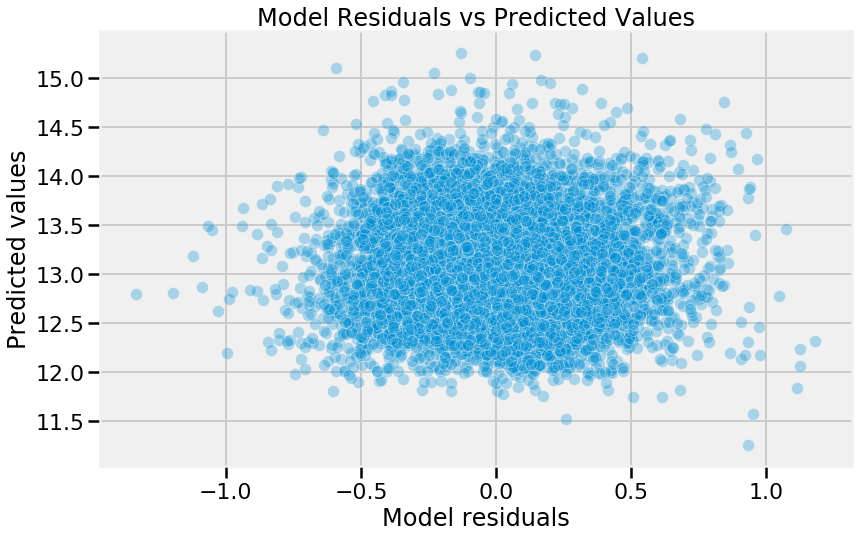

In [153]:
# create plot of residuals vs predicted values
# visually inspect for homoskedasticity
fig, ax = plt.subplots(figsize=(12,8))
sns.scatterplot(model_for_resids.resid, y_preds, alpha=.3)
plt.title("Model Residuals vs Predicted Values")
plt.xlabel("Model residuals")
plt.ylabel("Predicted values");

In [114]:
def breusch_pagan(model):
    # run Breusch-Pagan to look for homoscedasticity
    labels = ["Lagrange Multiplier", "p-value", "F-Statistic", "F p-value"]
    test = sms.het_breuschpagan(model.resid, model.model.exog)
    breusch_pagan = pd.DataFrame(test, labels)
    breusch_pagan.rename(columns={0: "statistics"}, inplace=True)
    return breusch_pagan

In [115]:
breusch_pagan(model_for_resids)

,statistics
Lagrange Multiplier,7.251619e+02
p-value,2.208272e-138
F-Statistic,3.295762e+01
F p-value,8.806484e-142


Visualizing the data residuals versus predictions for the training data, it is apparent that the data is concentrated around in the center of the plot, and not randomly distributed. From the Breusch-Pagan test, the model residuals exhibit heterscedasticity. Both the Lagrange multiplier and F statistic are large, while their corresponding p-tests extremely small, meaning the null hypothesis (homoskedasticity) is rejected.

## Check for normal distribution of residuals

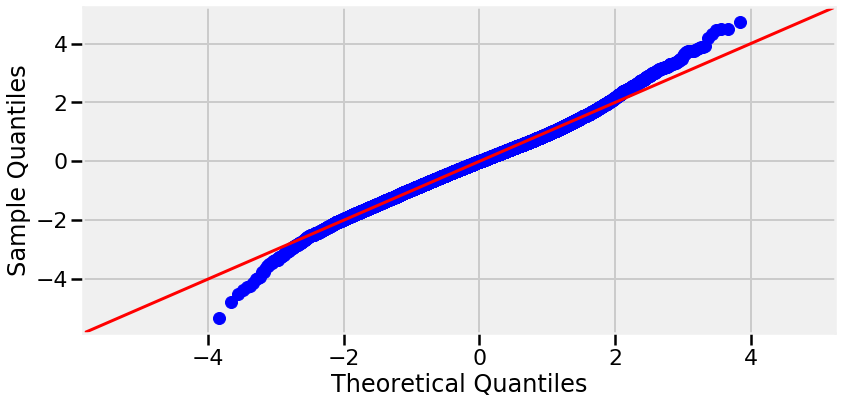

In [150]:
# create a qqplot
import scipy.stats as stats
fig, ax = plt.subplots(figsize=(12,6))
fig = sm.graphics.qqplot(model_for_resids.resid, dist=stats.norm, line="45", fit=True, ax=ax)

In [117]:
def jarque_bera(model):
    # use Jarque-Bera test to look at normality
    name = ["Jarque-Bera", "Chi^2 two-tail prob.", "Skew", "Kurtosis"]
    test = pd.DataFrame(sms.jarque_bera(model.resid), name)
    test.rename(columns={0: "statistics"}, inplace=True)
    return test

In [118]:
jarque_bera(model_for_resids)

,statistics
Jarque-Bera,4.945960e+02
Chi^2 two-tail prob.,3.979725e-108
Skew,1.323066e-01
Kurtosis,3.814156e+00


Based on the qqplot and Jarque-Bera test, the residuals violate the normality assumption. The qqplot shows that the residuals have distinctly thin tails. The Jarque-Bera test further coroborates this; the score is far from a score of 0, which would indicate a normal distribution, and the low chi-squared score makes the test score significant at an alpha of 0.05. The residuals have a very slight skew, and the kurtosis measure points to a leptokurtic distribution, which was also indicated in the qqplot. These factors negatively impact the r-squared score.

# Conclusions

Using OLS regression, the best performing model consisted of the following features:
* sqft_living
* waterfront
* lat
* grade*sqft_living15

The final r-squared score for the train data was approximately 0.717, while the r-squared score for the test data was 0.712, meaning the model can explain the variation in home prices ~71.2\% of the time. The model produces a RSE of \\$211,724, which is the average amount the selling price differs from what the model predicts. While there is no set standard by which to judge RSE, it's fair to say that producing an error this large may be problematic. The RSE is about 39.4\% of the average selling price of \\$537,861, to put it into perspective.

Looking at the regression diagnostics, it can be concluded that all three assumptions for the residuals of a linear regression model have most likely been violated. The distribution of the residuals is leptokurtic, they exhibit heterskedasticity, and the model variables may not have a linear relationship with the target. 

Taking all of this information into account, a linear model may not be the best model to use for this dataset, but a decent linear model was nevertheless created. For the realtor, it does give an idea of the important factors contributing to the sale price of a home out of a pool of features. Some of the features, such as liveable square footage, waterfront properties and renovations may not be surprising as being important. Other features, such as latitude and grade*sqft_living15 are more interesting. 

This model should be used in conjunction with realtor experience and intuition in the formulation of an appropriate asking and/or selling price for a client's home. If they are available, adding more features to include in the model as well as more year's worth of data may improve the accuracy of the model. Other predictive models should also be considered; the goal would be to find a predictive model that would increase accuracy while decreasing or maintaining model complexity. This linear model is a great starting point because it is relatively easy to understand and interpret.

## Next Steps
Going back to the histograms of the features prior to log transformation, some of the features, such as sqft_lot, had data points that were significantly larger than the other data points, skewing the distribution. It may be worthwhile to go through each of these features and look for outliers. Taking these outliers into account and potentially adjusting for them may make some the features that were insignificat, significant. This in turn could lead to a better model.